In [37]:
from PIL import Image, ImageDraw, ImageFont
from pathlib import Path
from pprint import pp

tile_size = 8
font_path = r'..\..\resources\胡晓波男神体2.0.otf'
palette_path = Path('pal1_BD-73-FF-00.png')

palette = None
with Image.open(palette_path) as im:
    palette = tuple(entry[1] for entry in im.convert('L').getcolors())

pp(palette)

(0, 115, 189, 255)


In [38]:
def real_bbox(text, font_path: str, font_size: int) -> Image:
    width = len(text) * font_size
    height = font_size
    with Image.new('L', (width*3, height*3)) as img:
        draw = ImageDraw.Draw(img)
        font = ImageFont.truetype(font_path, font_size)
        draw.text(
            (width, height), text, font=font, fill="white",
            stroke_width=0, stroke_fill=115
        )
        
        xMin = width * 3
        yMin = height * 3
        xMax, yMax = 0, 0
        for y in range(img.height):
            for x in range(img.width):
                if (v := img.getpixel((x, y))) not in palette:
                    v = min(palette, key=lambda c: abs(c-v))
                    img.putpixel((x, y), v)
                    
                if v != 0:
                    xMin = min(xMin, x)
                    yMin = min(yMin, y)
                    xMax = max(xMax, x)
                    yMax = max(yMax, y)

        return img.crop((xMin, yMin, xMax+1, yMax+1))

In [39]:
def generate_text_img(text: str, max_columns: int, max_rows: int, font_path: str) -> Image:
    global optimal_font_size
    max_width = int(max_columns * tile_size)
    max_height = int(max_rows * tile_size)
    font_size = max(max_width, max_height)
    while True:
        img = real_bbox(text, font_path, font_size)
        if img.height > max_height or img.width > max_width:
            font_size -= 1
        else:
            print(f'{font_size = }')
            break

    print(f'width = {img.width}, height = {img.height}')
    print(f'{img.getcolors() = }')
    
    img = img.resize((max_width-2, max_height-2))
    for y in range(img.height):
        for x in range(img.width):
            if (v := img.getpixel((x, y))) not in palette:
                v = min(palette, key=lambda c: abs(c-v))
                img.putpixel((x, y), v)
    return img

In [40]:
text = "综合评价"
max_columns = 9
max_rows = 2

im1 = generate_text_img(text, max_columns, max_rows, font_path)
im1

font_size = 16
width = 64, height = 16
img.getcolors() = [(490, 0), (137, 115), (82, 189), (315, 255)]


In [41]:
text = "等级"
max_columns = 4
max_rows = 2

im2 = generate_text_img(text, max_columns, max_rows, font_path)
im2

font_size = 16
width = 32, height = 16
img.getcolors() = [(211, 0), (78, 115), (61, 189), (162, 255)]


In [42]:
text = "游戏时间"
max_columns = 6
max_rows = 2

im3 = generate_text_img(text, max_columns, max_rows, font_path)
im3

font_size = 12
width = 48, height = 12
img.getcolors() = [(153, 0), (180, 115), (103, 189), (140, 255)]


In [43]:
text = "失误次数"
max_columns = 6
max_rows = 2

im4 = generate_text_img(text, max_columns, max_rows, font_path)
im4

font_size = 12
width = 48, height = 13
img.getcolors() = [(290, 0), (116, 115), (88, 189), (130, 255)]


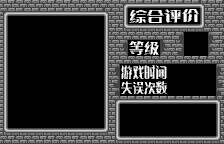

In [44]:
bg = None
with Image.open("04EDD0.png", 'r') as bg:
    bg.paste((0,0,0), (128,8,200,24))
    bg.paste(im1, (round((128+200-im1.width)/2), round((8+24-im1.height)/2)))
    # bg.paste(im1.resize((200-128-2, 24-8-2)), (128+1,8+1))
    bg.paste((0,0,0), (128,40,160,56))
    bg.paste(im2, (round((128+160-im2.width)/2), round((40+56-im2.height)/2)))
    # bg.paste(im2.resize((160-128-2, 56-40-2)), (128+1,40+1))
    bg.paste((0,0,0), (120,64,168,96))
    bg.paste(im3, (round((120+168-im3.width)/2), round((64+80-im3.height)/2)))
    # bg.paste(im3.resize((168-120-2, 80-64-2)), (120+1,64+1))
    bg.paste(im4, (round((120+168-im4.width)/2), round((80+96-im4.height)/2)))
    # bg.paste(im4.resize((168-120-2, 96-80-2)), (120+1,80+1))
    bg.save("04EDD0_chs.png")

bg

In [45]:
print('Remember to recompress the tileset!!!')

Remember to recompress the tileset!!!
